# Number Classifier Using MNIST Dataset

In this notebook, I will create and train a neural network to identify handwritten numbers from 1-9.

In [3]:
#Imports
!pip install tensorflow

import numpy as np                   
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
astroid 2.5 requires wrapt<1.13,>=1.11, but you have wrapt 1.14.0 which is incompatible.
You should consider upgrading via the 'c:\users\usama\anaconda3\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 438.0/438.0 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 462.5/462.5 KB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 KB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 65.5/65.5 KB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 10.0 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 KB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 13.9/13.9 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 10.2 MB/s eta 0:00:00
     -------------------------------------- 126.7/126.7 KB 7.8 MB/s eta 0:00:00
     -----------------

## Loading Training Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [4]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 1s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Let's Plot some of our data!

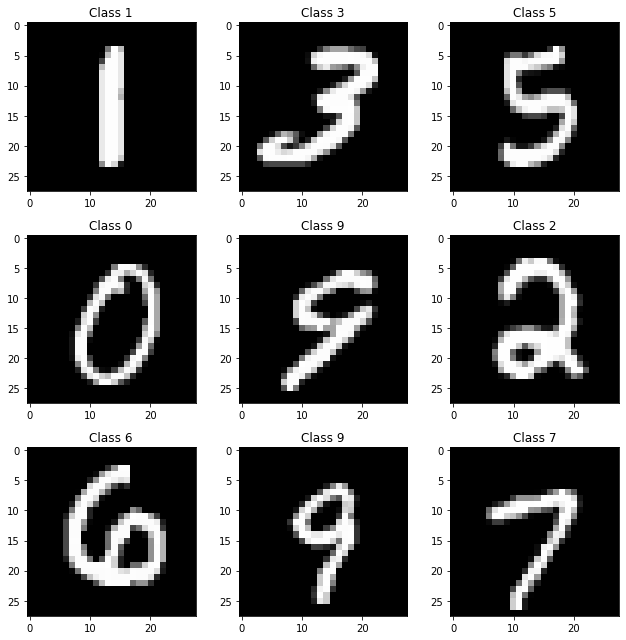

In [5]:
plt.rcParams['figure.figsize'] = (9,9) 

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

## Formatting the Input Data Layer

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

In [6]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


## Let's Build Our Fully Connected Layer!

In [7]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.
model = Sequential()
model.add(Dense(512, input_shape=(784,))) 
model.add(Activation('relu'))

In [8]:
#Second Hidden Layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [9]:
#Third Layer
model.add(Dense(10))


In [10]:
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
 activation_2 (Activation)   (None, 10)                0

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training Our Model

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!

In [12]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2272 - accuracy: 0.9318
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0842 - accuracy: 0.9742
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0527 - accuracy: 0.9836
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0389 - accuracy: 0.9878
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0278 - accuracy: 0.9911


# Evaluate Model's Accuracy on Test Data

In [13]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9803
Test score: 0.06765197217464447
Test accuracy: 0.9803000092506409


## Inspecting The Output

In [17]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = np.argmax(model.predict(X_test), axis=-1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

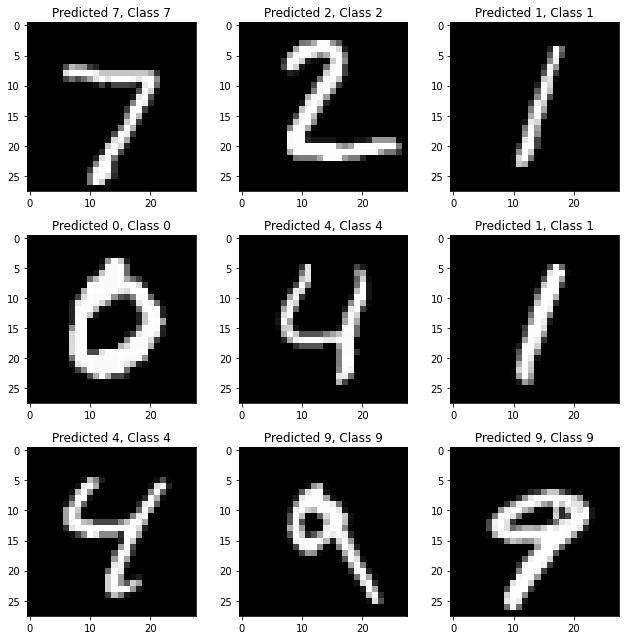

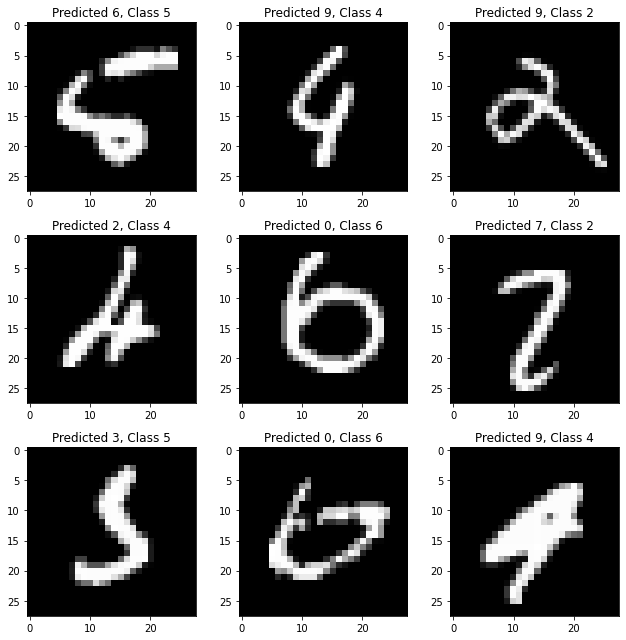

In [18]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()